In [1]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("268435456/*.cali"))

(1/2) Reading Files:   0%|          | 0/36 [00:00<?, ?it/s]

(2/2) Creating Thicket: 100%|██████████| 35/35 [00:00<00:00, 324.22it/s]
/home/ado/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [3]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
77740,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a268435456-sbitonic-isorted.cali,true,true,true,true,1729578017,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, bitonic, sorted]",c,bitonic,mpi,int,4,268435456,sorted,256,8,online,weak
44296492,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a268435456-sbitonic-i1perturbed.cali,true,true,true,true,1729578052,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, bitonic, 1perturbed]",c,bitonic,mpi,int,4,268435456,1perturbed,2,8,online,weak
94784244,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a268435456-sbitonic-irandom.cali,true,true,true,true,1729578044,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, bitonic, random]",c,bitonic,mpi,int,4,268435456,random,64,8,online,weak
469764212,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p4-a268435456-sbitonic-i1perturbed.cali,true,true,true,true,1729578044,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, bitonic, 1perturbed]",c,bitonic,mpi,int,4,268435456,1perturbed,4,8,online,weak
807998628,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a268435456-sbitonic-irandom.cali,true,true,true,true,1729578018,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, bitonic, random]",c,bitonic,mpi,int,4,268435456,random,256,8,online,weak


In [4]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

12.145 main
├─ 7.398 MPI_Comm_dup
├─ 0.053 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.512 comm
│  ├─ 0.284 comm_large
│  │  ├─ 0.060 MPI_Gather
│  │  ├─ 0.088 MPI_Scatter
│  │  └─ 0.135 MPI_Sendrecv
│  └─ 0.228 comm_small
│     ├─ 0.081 MPI_Barrier
│     └─ 0.146 MPI_Bcast
├─ 1.509 comp
│  └─ 1.508 comp_large
├─ 0.029 correctness_check
└─ 0.829 data_init_runtime
   └─ 0.810 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 12.15 indices: {'profile': np.int64(77740)})
█ 10.93 - 12.15
█ 8.50 - 10.93
█ 6.07 - 8.50
█ 3.64 - 6.07
█ 1.21 - 3.64
█ 0.00 - 1.21

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",77740,1.0,regionprofile,12.138164,12.155255,12.145313,3109.200084,0.000019,1.789784,1.846168,1.814958,464.629237,NaN,NaN,NaN,NaN,main,256,sorted,268435456
1,"{'name': 'main', 'type': 'function'}",44296492,1.0,regionprofile,160.002965,160.002989,160.002977,320.005954,0.000000,1.101005,1.107954,1.104480,2.208960,NaN,NaN,NaN,NaN,main,2,1perturbed,268435456
2,"{'name': 'main', 'type': 'function'}",94784244,1.0,regionprofile,16.905409,16.913577,16.909684,1082.219792,0.000009,1.700204,1.748641,1.724749,110.383966,NaN,NaN,NaN,NaN,main,64,random,268435456
3,"{'name': 'main', 'type': 'function'}",469764212,1.0,regionprofile,89.667720,89.667746,89.667737,358.670948,0.000000,1.150491,1.156989,1.153118,4.612471,NaN,NaN,NaN,NaN,main,4,1perturbed,268435456
4,"{'name': 'main', 'type': 'function'}",807998628,1.0,regionprofile,13.698451,13.728375,13.712121,3510.302848,0.000061,1.804261,2.885961,2.332441,597.104817,NaN,NaN,NaN,NaN,main,256,random,268435456


In [37]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

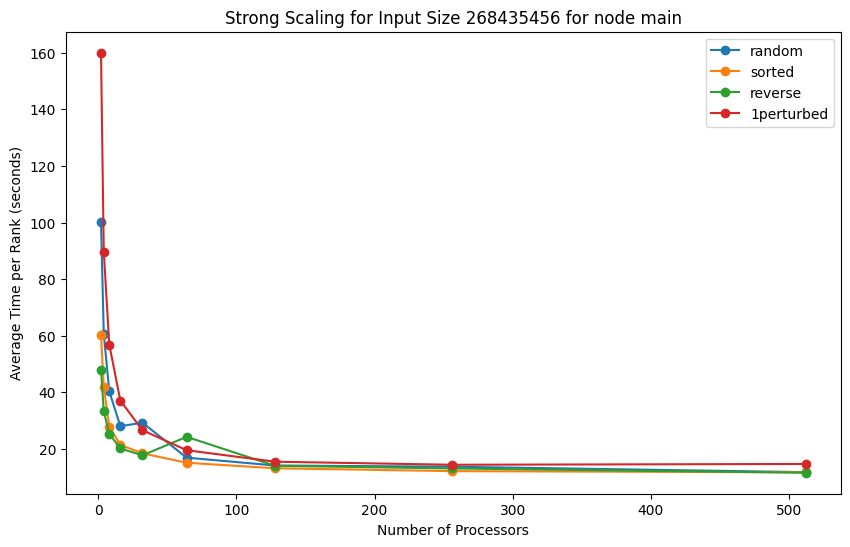

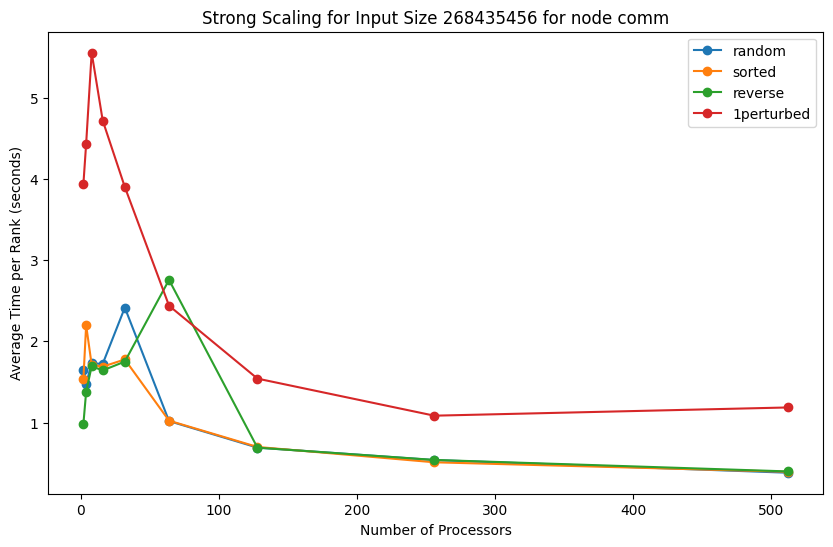

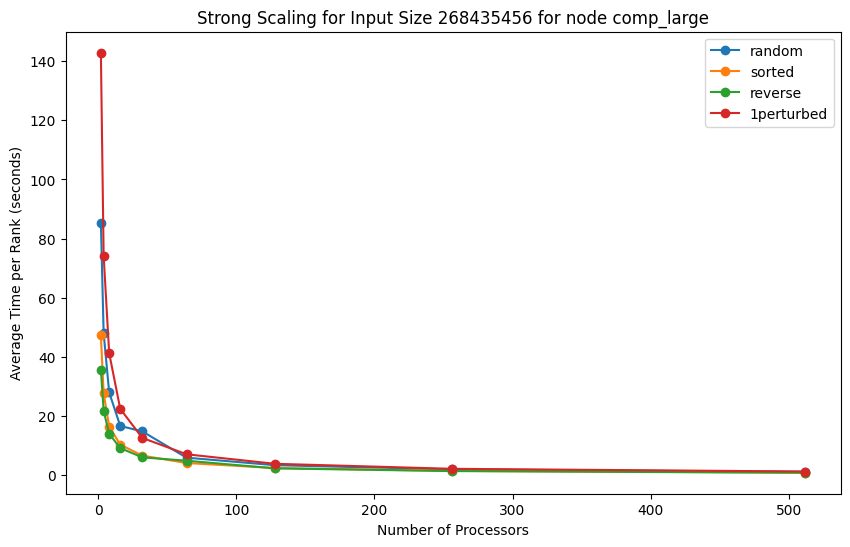

In [6]:
# input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
input_sizes = [268435456]

# Function to create strong scaling plots
def plot_strong_scaling(tk, input_sizes):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            for input_size in input_sizes:
                fig, ax = plt.subplots(figsize=(10, 6))
                for input_type in ["random", "sorted", "reverse", "1perturbed"]:
                    data = tk.dataframe[(tk.dataframe["input_type"] == input_type) & (tk.dataframe["input_size"] == input_size) & (tk.dataframe['node'] == node)]
                    data = data.sort_values(by="num_procs")
                    ax.plot(data["num_procs"], data["Avg time/rank"], marker='o', label=input_type)
                ax.set_title(f'Strong Scaling for Input Size {input_size} for node {node_name}')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Average Time per Rank (seconds)')
                ax.legend()
                plt.show()

plot_strong_scaling(tk, input_sizes)

In [92]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

,node,num_procs,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",128,34514284,1.0,regionprofile,2.162364,2.185724,2.174416,278.325248,0.000101,1.890610,1.925751,1.911400,244.659139,NaN,NaN,NaN,NaN,main,random,4194304
1,"{'name': 'main', 'type': 'function'}",16,51158898,1.0,regionprofile,2.402589,2.402741,2.402685,38.442963,0.000000,1.958913,1.959291,1.959066,31.345059,NaN,NaN,NaN,NaN,main,random,4194304
2,"{'name': 'main', 'type': 'function'}",2,210478988,1.0,regionprofile,2.432996,2.433015,2.433006,4.866011,0.000000,1.131202,1.132303,1.131753,2.263505,NaN,NaN,NaN,NaN,main,random,4194304
3,"{'name': 'main', 'type': 'function'}",8,389822904,1.0,regionprofile,1.233312,1.234984,1.234233,9.873867,0.000001,0.499257,0.501330,0.500364,4.002911,NaN,NaN,NaN,NaN,main,1perturbed,4194304
4,"{'name': 'main', 'type': 'function'}",4,1161105437,1.0,regionprofile,1.514166,1.514255,1.514207,6.056828,0.000000,0.368166,0.374936,0.373074,1.492295,NaN,NaN,NaN,NaN,main,1perturbed,4194304
5,"{'name': 'main', 'type': 'function'}",256,1656300721,1.0,regionprofile,2.053408,2.322270,2.280886,583.906900,0.007409,1.816951,2.124346,2.037715,521.654961,NaN,NaN,NaN,NaN,main,random,4194304
6,"{'name': 'main', 'type': 'function'}",8,1876752849,1.0,regionprofile,2.139028,2.143197,2.142628,17.141022,0.000002,1.581236,1.585922,1.584843,12.678741,NaN,NaN,NaN,NaN,main,random,4194304
7,"{'name': 'main', 'type': 'function'}",64,2019302383,1.0,regionprofile,1.995686,2.037916,2.017470,129.118092,0.000292,1.528815,1.565156,1.542224,98.702343,NaN,NaN,NaN,NaN,main,1perturbed,4194304
8,"{'name': 'main', 'type': 'function'}",512,2405902553,1.0,regionprofile,2.211498,2.301872,2.264290,1159.316730,0.000827,1.864771,2.094367,1.982914,1015.251961,NaN,NaN,NaN,NaN,main,random,4194304
9,"{'name': 'main', 'type': 'function'}",2,2466704898,1.0,regionprofile,2.233422,2.233807,2.233614,4.467229,0.000000,0.318014,0.321672,0.319843,0.639686,NaN,NaN,NaN,NaN,main,1perturbed,4194304
